<a href="https://colab.research.google.com/github/wangpouwei/Paul/blob/master/dlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras


In [4]:
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


8


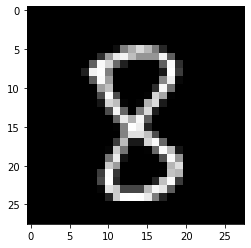

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0,5999)
print(y_train[c])
plt.imshow(x_train[c], cmap= "gray")

In [7]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,46,...,95,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,97,250,...,250,47,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,32,243,254,...,254,61,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,93,250,...,237,8,0,0,0,0,0,0,0,0


In [8]:
# 資料預先處理
# 1. 題目預先處理(Normalize)
# keras 在準備隨機那組weights, 跟Normmalize的圖片比較搭
# 1. 第一種方式： 0-1 第二種方式： -1 - 1
# 攤開 => keras MLP 規定一定要攤開成為1維
x_train_shape = x_train.reshape(60000,784)/255
x_test_shape = x_test.reshape(10000,784)/255
x_train_shape[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
# 2.答案預先處理()
# 希望的樣子[p1, p2, p3, ...p9]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原來", y_train[1])
print("後來", y_train_cat[1])

原來 0
後來 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
from keras.layers.attention.multi_head_attention import activation
# 建立模型
# 第一種：蛋糕支架(Sequential，堆上一層(layers)
# layers：Dense(全連接層)
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層`: input_dim => 告訴他輸入有幾個
# param：784 * 128 + 128(bias) =100480
mlp.add(Dense(128, activation="relu", input_dim=784))
# param：128 * 10(神經元的連結) + 10 (10個輸出， 10個激活 => 十個偏差)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 確定模型訓練方式
# 隨機(隨便一組weight)梯度(正確方向)下降
# loss: 最後輸出一個 ： binary_crossrntropy  多個categorical_crossentropy
mlp.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
              optimizer="adam")

In [12]:
# batch；看幾筆(200)做一次梯度下降(修正
# epochs`: 整份考古題(資料)看幾次(10)
# 10個epochs ,200batch_size ：60000*10/200 =>3000次的修正
                    
mlp.fit(x_train_shape,
        y_train_cat,
        batch_size=200,
        epochs = 5,
        validation_split= 0.1,
        verbose=2)

Epoch 1/5
270/270 - 2s - loss: 0.4247 - accuracy: 0.8854 - val_loss: 0.1859 - val_accuracy: 0.9503 - 2s/epoch - 8ms/step
Epoch 2/5
270/270 - 1s - loss: 0.2003 - accuracy: 0.9426 - val_loss: 0.1402 - val_accuracy: 0.9612 - 1s/epoch - 5ms/step
Epoch 3/5
270/270 - 1s - loss: 0.1488 - accuracy: 0.9568 - val_loss: 0.1224 - val_accuracy: 0.9670 - 1s/epoch - 5ms/step
Epoch 4/5
270/270 - 1s - loss: 0.1187 - accuracy: 0.9664 - val_loss: 0.1029 - val_accuracy: 0.9722 - 1s/epoch - 5ms/step
Epoch 5/5
270/270 - 1s - loss: 0.0971 - accuracy: 0.9721 - val_loss: 0.0922 - val_accuracy: 0.9737 - 1s/epoch - 5ms/step


In [13]:
mlp.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9697


[0.10427609831094742, 0.9696999788284302]

In [14]:
#predict : 機率  predict_classes : 分類
import numpy as np
#tensorflow取消 predict_classes 需用以下取代
predict_x = mlp.predict(x_test_shape) 
classes_x=np.argmax(predict_x,axis=1)
# pre = mlp.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, classes_x))

313/313 [==============================] - 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9
0,972,0,1,0,0,3,1,1,2,0
1,0,1120,3,0,0,1,5,0,6,0
2,4,2,1002,2,2,2,3,8,7,0
3,0,0,8,966,0,10,0,10,12,4
4,1,0,5,2,947,0,6,4,3,14
5,2,0,0,7,2,867,8,0,5,1
6,11,3,1,0,6,8,927,0,2,0
7,0,4,9,1,0,0,0,1000,1,13
8,5,0,2,9,6,4,5,9,930,4
9,5,6,2,9,7,4,0,9,1,966


In [17]:
# numpy才可以每個數字做比較
classes_x != y_test

array([False, False, False, ..., False, False, False])